In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
message = pd.read_csv('message.csv', names = ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction'])
order_book = pd.read_csv('order book.csv', names = ['AskPrice1', 'AskSize1', 'BidPrice1', 'BidSize1', 'AskPrice2', 'AskSize2', 'BidPrice2', 'BidSize2', 'AskPrice3', 'AskSize3', 'BidPrice3', 'BidSize3', 'AskPrice4', 'AskSize4', 'BidPrice4', 'BidSize4', 'AskPrice5', 'AskSize5', 'BidPrice5', 'BidSize5', 'AskPrice6', 'AskSize6', 'BidPrice6', 'BidSize6', 'AskPrice7', 'AskSize7', 'BidPrice7', 'BidSize7', 'AskPrice8', 'AskSize8', 'BidPrice8', 'BidSize8', 'AskPrice9', 'AskSize9', 'BidPrice9', 'BidSize9', 'AskPrice10', 'AskSize10', 'BidPrice10', 'BidSize10'])


In [3]:
print(message.shape)
message.iloc[:10]

(147916, 6)


,Time,Type,OrderID,Size,Price,Direction
0,34200.015105,4,15818974,4,5794000,1
1,34200.059902,4,15818974,300,5794000,1
2,34200.113247,5,0,1,5795100,1
3,34200.113247,5,0,1,5795000,1
4,34200.113247,5,0,1,5794900,1
5,34200.113247,5,0,1,5794800,1
6,34200.113247,4,15818974,167,5794000,1
7,34200.154178,1,16155653,100,5794000,1
8,34200.173594,1,16160421,100,5791200,1
9,34200.202323,1,7091133,40,5790000,1


In [4]:
# first analyze the message data and order book data
# then we can start to build the model
order_book.iloc[:10, :]

,AskPrice1,AskSize1,BidPrice1,BidSize1,AskPrice2,AskSize2,BidPrice2,BidSize2,AskPrice3,AskSize3,...,BidPrice8,BidSize8,AskPrice9,AskSize9,BidPrice9,BidSize9,AskPrice10,AskSize10,BidPrice10,BidSize10
0,5802300,100,5794000,496,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
1,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
2,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
3,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
4,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
5,5802300,100,5794000,196,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
6,5802300,100,5794000,29,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
7,5802300,100,5794000,129,5804300,100,5787000,400,5805000,100,...,5762600,100,5880000,100,5732000,20,5892600,100,5700000,100
8,5802300,100,5794000,129,5804300,100,5791200,100,5805000,100,...,5766000,100,5880000,100,5762600,100,5892600,100,5732000,20
9,5802300,100,5794000,129,5804300,100,5791200,100,5805000,100,...,5769400,100,5880000,100,5766000,100,5892600,100,5762600,100


In [5]:
# add a new column to the message data
# which is the fair mid price using the average of the bid and ask price
message['FairMidPrice'] = (order_book['AskPrice1'] + order_book['BidPrice1']) / 2
message.head(20)

,Time,Type,OrderID,Size,Price,Direction,FairMidPrice
0,34200.015105,4,15818974,4,5794000,1,5798150.0
1,34200.059902,4,15818974,300,5794000,1,5798150.0
2,34200.113247,5,0,1,5795100,1,5798150.0
3,34200.113247,5,0,1,5795000,1,5798150.0
4,34200.113247,5,0,1,5794900,1,5798150.0
5,34200.113247,5,0,1,5794800,1,5798150.0
6,34200.113247,4,15818974,167,5794000,1,5798150.0
7,34200.154178,1,16155653,100,5794000,1,5798150.0
8,34200.173594,1,16160421,100,5791200,1,5798150.0
9,34200.202323,1,7091133,40,5790000,1,5798150.0


In [6]:
# check for certain orderID, we don't see the order be executed
# Get the OrderID with submission order type '1'
submission_order_ids = message[message['Type'] == 1]['OrderID']

# Get the OrderID with order type '4'
execution_order_ids = message[message['Type'] == 4]['OrderID']

# Get the OrderID for which there is submission order type '1', but no order type '4'
missing_order_ids = submission_order_ids[~submission_order_ids.isin(execution_order_ids)]

# Print the missing OrderIDs
# missing OrderIDs are orders have never been executed
print(missing_order_ids)



10          4773921
12          1910227
14         12686268
16          1333270
18          1376018
            ...    
147909    287157288
147910    287157289
147911    287157290
147912    287157291
147913    287157292
Name: OrderID, Length: 65778, dtype: int64


In [7]:
# randomly get select 10 orderID from the missing_order_ids]
# and check the order book data
missing_order_ids.sample(10)

for order_id in missing_order_ids.sample(10):
    print(message[message['OrderID'] == order_id])

               Time  Type   OrderID  Size    Price  Direction  FairMidPrice
31841  38125.954482     1  78359358    14  5752300          1     5754400.0
31851  38126.231308     3  78359358    14  5752300          1     5754950.0
              Time  Type   OrderID  Size    Price  Direction  FairMidPrice
8118  35235.965398     1  36225154  1000  5778200         -1     5768750.0
8122  35236.952800     3  36225154  1000  5778200         -1     5768200.0
               Time  Type    OrderID  Size    Price  Direction  FairMidPrice
65277  43639.283556     1  140440478    12  5717100          1     5719700.0
65287  43644.086602     3  140440478    12  5717100          1     5719150.0
               Time  Type   OrderID  Size    Price  Direction  FairMidPrice
15793  36288.795480     1  53581845   100  5758200         -1     5753650.0
15797  36289.124519     3  53581845   100  5758200         -1     5753650.0
               Time  Type    OrderID  Size    Price  Direction  FairMidPrice
50416  4060

In [8]:
# get the limit order submission
limit_order = message[message['Type'] == 1]
#print(limit_order.head(10))
#print(limit_order.shape)  

# get the OrderID of the limit order submission 
limit_order_id = limit_order['OrderID']
refined_message = message[message['OrderID'].isin(limit_order_id)] 

# from refined_message, get orderID has been executed\
executed_order = refined_message[refined_message['Type'] == 4]
executed_order_id = executed_order['OrderID']
#print(executed_order.head(10))
final_message = refined_message[refined_message['OrderID'].isin(executed_order_id)]

print(final_message.head(10))
print(final_message.shape)  

            Time  Type   OrderID  Size    Price  Direction  FairMidPrice
7   34200.154178     1  16155653   100  5794000          1     5798150.0
8   34200.173594     1  16160421   100  5791200          1     5798150.0
9   34200.202323     1   7091133    40  5790000          1     5798150.0
11  34200.202323     1   9248169     1  5790000          1     5796450.0
13  34200.202323     1   4496151     1  5789900          1     5796450.0
15  34200.202323     1   4773351     9  5785000          1     5796450.0
17  34200.202323     1    858821    10  5782100          1     5796450.0
19  34200.202323     1   2175511     5  5780000          1     5796450.0
21  34200.202323     1   5858286     5  5780000          1     5796450.0
23  34200.202323     1   9476859    28  5780000          1     5796450.0
(13005, 7)


In [9]:
# group by the OrderID 
order_group = final_message.groupby('OrderID')
# for each orderID group, compute the following quantities
# time_diff: the time between last execution, and the first submission
# size_executed: the total size executed
# spread: the difference between the first submission price and the fair mid price
# direction: the direction of the first submission

time_diff = order_group.apply(lambda x: x[x['Type'] == 4]['Time'].max() - x[x['Type'] == 1]['Time'].min())
size_executed = order_group.apply(lambda x: x[x['Type'] == 4]['Size'].sum())
spread = order_group.apply(lambda x: x[x['Type'] == 1]['FairMidPrice'].min() - x[x['Type'] == 1]['Price'].min())
spread = spread.abs()
direction = order_group.apply(lambda x: x[x['Type'] == 1]['Direction'].values[0])

# check the time_diff and size_executed
print('this is the time_diff \n')
print(time_diff.head(10))
print('\n\n this is the size_executed \n')
print(size_executed.head(10))
print('\n\n this is the spread \n')
print(spread.head(10))  
print('\n\n this is the direction \n')
print(direction.head(10))

this is the time_diff 

OrderID
858821     12.002251
2175511    12.002251
2176461    12.002898
4496151    11.939107
4773351    11.969646
5858286    12.002251
7091133    11.939107
9248169    11.939107
9476859    12.002251
9618128    12.002251
dtype: float64


 this is the size_executed 

OrderID
858821     10
2175511     5
2176461     1
4496151     1
4773351     9
5858286     5
7091133    40
9248169     1
9476859    28
9618128    50
dtype: int64


 this is the spread 

OrderID
858821     14350.0
2175511    16450.0
2176461    16550.0
4496151     6550.0
4773351    11450.0
5858286    16450.0
7091133     8150.0
9248169     6450.0
9476859    16450.0
9618128    16450.0
dtype: float64


 this is the direction 

OrderID
858821     1
2175511    1
2176461    1
4496151    1
4773351    1
5858286    1
7091133    1
9248169    1
9476859    1
9618128    1
dtype: int64


In [10]:
# print the quantile of the time_diff
print('quantile of time_diff')
print(time_diff.quantile([0.15, 0.3, 0.4, 0.5, 0.6, 0.95]))

# print the size_executed
print('quantile of size_executed')
print(size_executed.quantile([0.25, 0.3, 0.4, 0.5, 0.6, 0.85]))

quantile of time_diff
0.15     0.003826
0.30     0.539022
0.40     1.476524
0.50     3.036300
0.60     5.141881
0.95    60.030397
dtype: float64
quantile of size_executed
0.25     13.0
0.30     34.7
0.40    100.0
0.50    100.0
0.60    100.0
0.85    100.0
dtype: float64


In [11]:
# create a new dataframe
new_df = pd.DataFrame({'time_diff': time_diff, 'size_executed': size_executed, 'spread': spread, 'direction': direction})
new_df = new_df.reset_index()
print(new_df.head(10))


   OrderID  time_diff  size_executed   spread  direction
0   858821  12.002251             10  14350.0          1
1  2175511  12.002251              5  16450.0          1
2  2176461  12.002898              1  16550.0          1
3  4496151  11.939107              1   6550.0          1
4  4773351  11.969646              9  11450.0          1
5  5858286  12.002251              5  16450.0          1
6  7091133  11.939107             40   8150.0          1
7  9248169  11.939107              1   6450.0          1
8  9476859  12.002251             28  16450.0          1
9  9618128  12.002251             50  16450.0          1


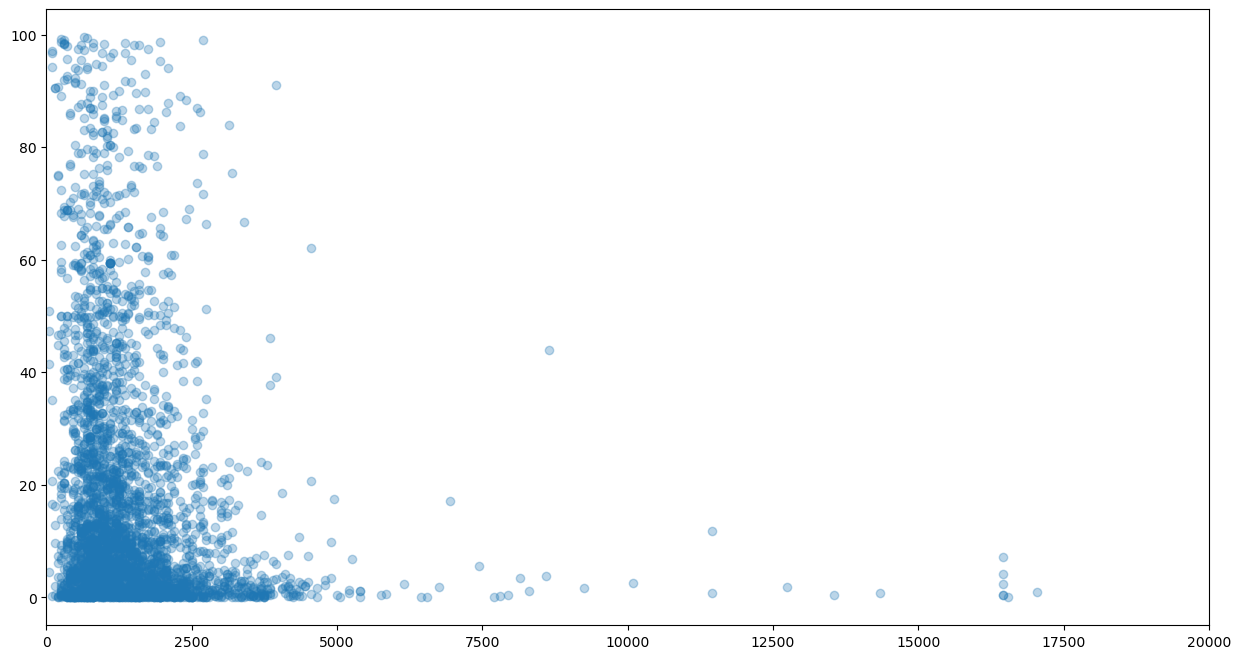

In [12]:
condition = new_df['time_diff'] > time_diff.quantile(0.15)
filter_df = new_df[condition].copy()
filter_df['normalized_rate'] = filter_df['size_executed'] / filter_df['time_diff']
filter_df['normalized_rate'].quantile([0.8, 0.85, 0.9, 0.95, 0.99, 1.0])
filter_df = filter_df[filter_df['normalized_rate'] < filter_df['normalized_rate'].quantile(0.8)]

plt.figure(figsize = (15, 8))
plt.scatter(filter_df['spread'], filter_df['normalized_rate'], alpha = 0.3)
plt.xlim(0, 20000)
plt.show()

In [13]:
# estimate the joint density estimation of the spread and normalized rate
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# estimate the joint density estimation of the spread and normalized rate
X = filter_df[['spread', 'normalized_rate']]
# mean and std of the spread and normalized rate
mean = X.mean()
std = X.std()
X_normalized = (X - mean) / std

# use multivariate kernel density estimation to estimate the joint density
bandwidths = 10 ** np.linspace(-1, 1, 10)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=KFold(n_splits=5))
grid.fit(X_normalized)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])})

In [14]:
l = X['spread'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
quantile_spread = l.to_list()
quantile_spread

[550.0, 750.0, 900.0, 1050.0, 1200.0, 1400.0, 1600.0, 1950.0, 2450.0]

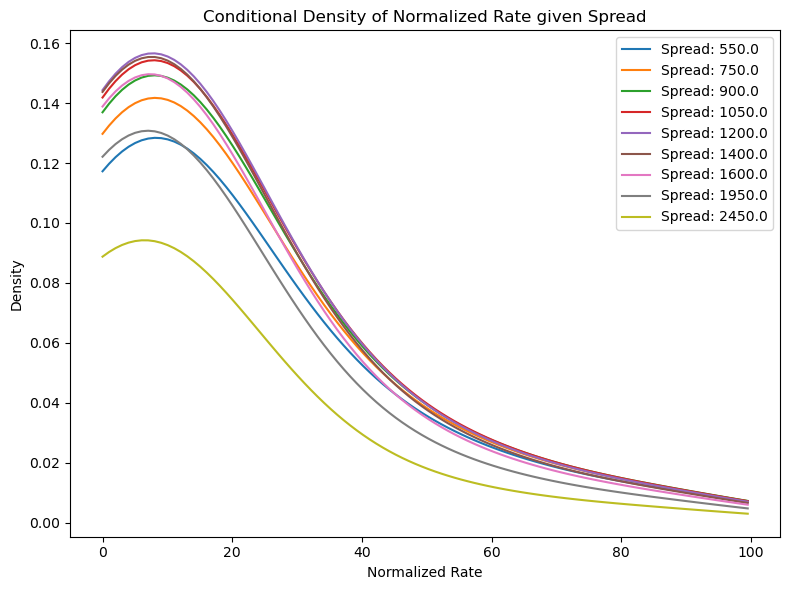

In [15]:
def conditional_density_plot(specific_spread, ax):
    normalized_spread = (specific_spread - mean['spread']) / std['spread']
    normalized_rate_range = np.linspace(X_normalized['normalized_rate'].min(), X_normalized['normalized_rate'].max(), 100)
    X_conditional = np.vstack([np.full(normalized_rate_range.shape, normalized_spread), normalized_rate_range]).T
    # add feature name to X_conditional
    X_conditional = pd.DataFrame(X_conditional, columns = ['spread', 'normalized_rate'])
    log_density_conditional = grid.best_estimator_.score_samples(X_conditional)
    density_conditional = np.exp(log_density_conditional)
    ax.plot(normalized_rate_range * std['normalized_rate'] + mean['normalized_rate'], density_conditional, label=f"Spread: {specific_spread}")
    ax.set_xlabel('Normalized Rate')
    ax.set_ylabel('Density')
    ax.set_title('Conditional Density of Normalized Rate given Spread')
    ax.legend()

fig, ax = plt.subplots(figsize=(8, 6))

for specific_spread in quantile_spread:
    conditional_density_plot(specific_spread, ax)

plt.tight_layout()
plt.show()


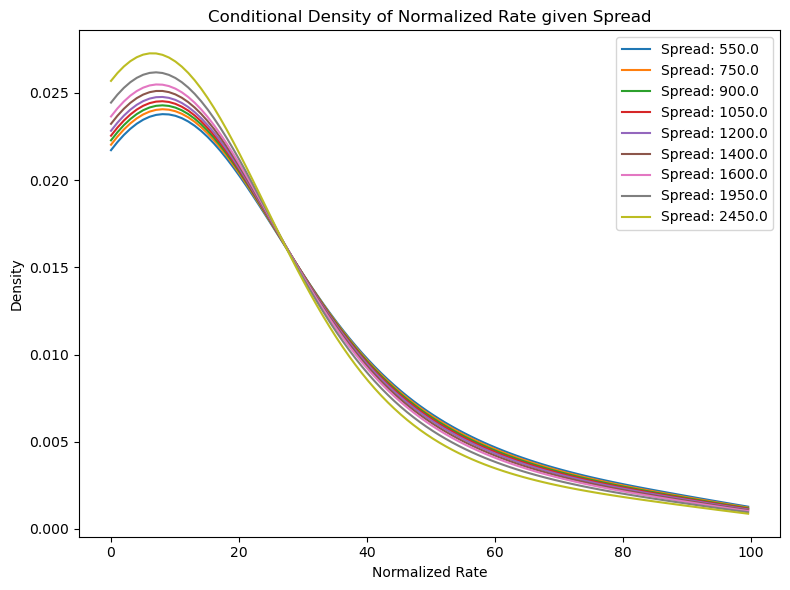

In [16]:
def conditional_density_plot(specific_spread, ax):
    normalized_spread = (specific_spread - mean['spread']) / std['spread']
    normalized_rate_range = np.linspace(X_normalized['normalized_rate'].min(), X_normalized['normalized_rate'].max(), 100)
    X_conditional = np.vstack([np.full(normalized_rate_range.shape, normalized_spread), normalized_rate_range]).T
    # add feature name to X_conditional
    X_conditional = pd.DataFrame(X_conditional, columns = ['spread', 'normalized_rate'])
    log_density_conditional = grid.best_estimator_.score_samples(X_conditional)
    density_conditional = np.exp(log_density_conditional)
    density_conditional = density_conditional / density_conditional.sum()
    ax.plot(normalized_rate_range * std['normalized_rate'] + mean['normalized_rate'], density_conditional, label=f"Spread: {specific_spread}")
    ax.set_xlabel('Normalized Rate')
    ax.set_ylabel('Density')
    ax.set_title('Conditional Density of Normalized Rate given Spread')
    ax.legend()

fig, ax = plt.subplots(figsize=(8, 6))

for specific_spread in quantile_spread:
    conditional_density_plot(specific_spread, ax)

plt.tight_layout()
plt.show()

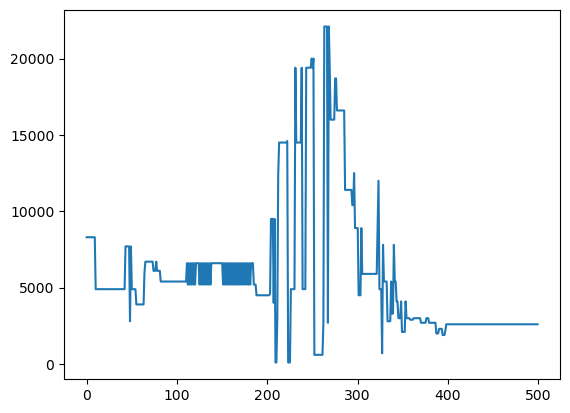

In [17]:
bid_spread = order_book['AskPrice1'] - order_book['BidPrice1']
bid_spread
# plot the first 1000 bid spread
plt.plot(bid_spread[:500])